In this notebook, textual data - title and transcript, of the TED talks will be processed by combining similar forms of the same word (lemmatizing) and the removal of stopwords so that key words in the text can be focused on. Exploratory data analysis is then conducted to observe for frequently occurring words in the title and transcript of the talks for insights.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import regex as re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = "retina"
%matplotlib inline

## Load TED talks data with new features

In [2]:
ted_talks = pd.read_csv("../data/ted_talks_new_features.csv", 
            parse_dates=["published_time", "recorded_date"])

In [3]:
# observe top 5 rows of df
display(ted_talks.head())

# view shape of df
ted_talks.shape

,id,title,description,url,num_views,num_comments,is_featured,video_type,event,institute_name,...,action_join,action_learn,action_organize,action_participate,action_petition,action_share,action_sign_up,action_subscribe,action_visit,action_volunteer
0,62845,What foods did your ancestors love?,"Around the world, Indigenous food cultures van...",https://www.ted.com/talks/aparna_pallavi_what_...,927821,6,1,TEDx Talk,TEDxCapeTownWomen,None,...,0,0,0,0,0,0,0,0,0,0
1,64185,Stop being a bystander in your own life,"""Life doesn't go from A to B -- it's messy,"" s...",https://www.ted.com/talks/tracy_edwards_stop_b...,1060372,11,1,TED Stage Talk,TED2020,None,...,0,0,0,1,0,0,0,0,0,0
2,63727,"How women will lead us to freedom, justice and...","""I was the first woman president of an African...",https://www.ted.com/talks/h_e_ellen_johnson_si...,862024,16,1,TED Stage Talk,TEDWomen 2019,None,...,1,0,0,0,0,0,0,0,0,0
3,60319,The beauty and complexity of finding common gr...,"How can we disagree with one another, respectf...",https://www.ted.com/talks/matt_trombley_the_be...,254885,16,1,TED Institute Talk,TED@WellsFargo,Wells Fargo,...,0,0,0,0,0,0,0,0,0,0
4,64534,How Dolly Parton led me to an epiphany,"How do you end a story? Host of ""Radiolab"" Jad...",https://www.ted.com/talks/jad_abumrad_how_doll...,906824,26,1,TED Stage Talk,TED2020,None,...,0,0,0,0,0,0,0,0,0,0


(3964, 521)

## 5.1 Pre-processing

In [4]:
# function to: 
# 1. Remove non-letters
# 2. Tokenize words
# 3. Lemmatize words
# 4. Remove stopwords

def clean_text(raw_text):
    
    #  instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # 1. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # 2. Convert to lower case and tokenize
    words = letters_only.lower().split()
    
    # 3. Lemmatize words
    words_lem = [lemmatizer.lemmatize(w) for w in words]
    
    # 4a. Convert stopwords to a set for easy searching
    stop_words = set(stopwords.words("english"))
    
    # 4b. Remove stopwords
    meaningful_words = [w for w in words_lem if w not in stop_words]
    
    # join the words into a string
    return(" ".join(meaningful_words))

In [5]:
# apply function to process raw text

# column: title
ted_talks["p_title"] = ted_talks["title"].map(clean_text)

# column: transcript
ted_talks["p_transcript"] = ted_talks["transcript"].map(clean_text)

## 5.2 Exploratory Data Analysis (Textual Data)

In [6]:
# function to apply CountVectorizer on text and
# view top occurring words

def plot_top_words(p_col_name,
                   stop_words = None,
                   max_features = None,
                   ngram_range = (1,1),
                   max_df = 1.0,
                   min_df = 1):
    
    # instantiate CountVectorizer
    cvec = CountVectorizer(stop_words = stop_words,
                           max_features = max_features,
                           ngram_range = ngram_range,
                           max_df = max_df,
                           min_df = min_df)

    # vectorize words
    col_vec = cvec.fit_transform(ted_talks[p_col_name])

    # convert vectorized words into df
    col_vec_df = pd.DataFrame(col_vec.toarray(),
                              columns = cvec.get_feature_names())

    # save top 20 most common words as df
    col_vec_top = pd.DataFrame(col_vec_df.sum().sort_values(ascending = False).head(20))

    # plot top 20 frequently occurring words & no. of occurrences
    plt.figure(figsize=(12,8))
    sns.barplot(x=0,
                y=col_vec_top.index,
               data=col_vec_top)
    plt.title("Frequently occurring words in " + 
               p_col_name + 
               ", ngram_range=" + 
               str(ngram_range), fontsize=14)
    plt.xlabel("No. of occurrences", fontsize=12)
    plt.yticks(fontsize=12);

In [7]:
# list of stopwords to remove
title_stopwords = ["could", "like"]
transcript_stopwords = ["thank", "much", "applause", "laughter", "like", "wa", "da", 
                        "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

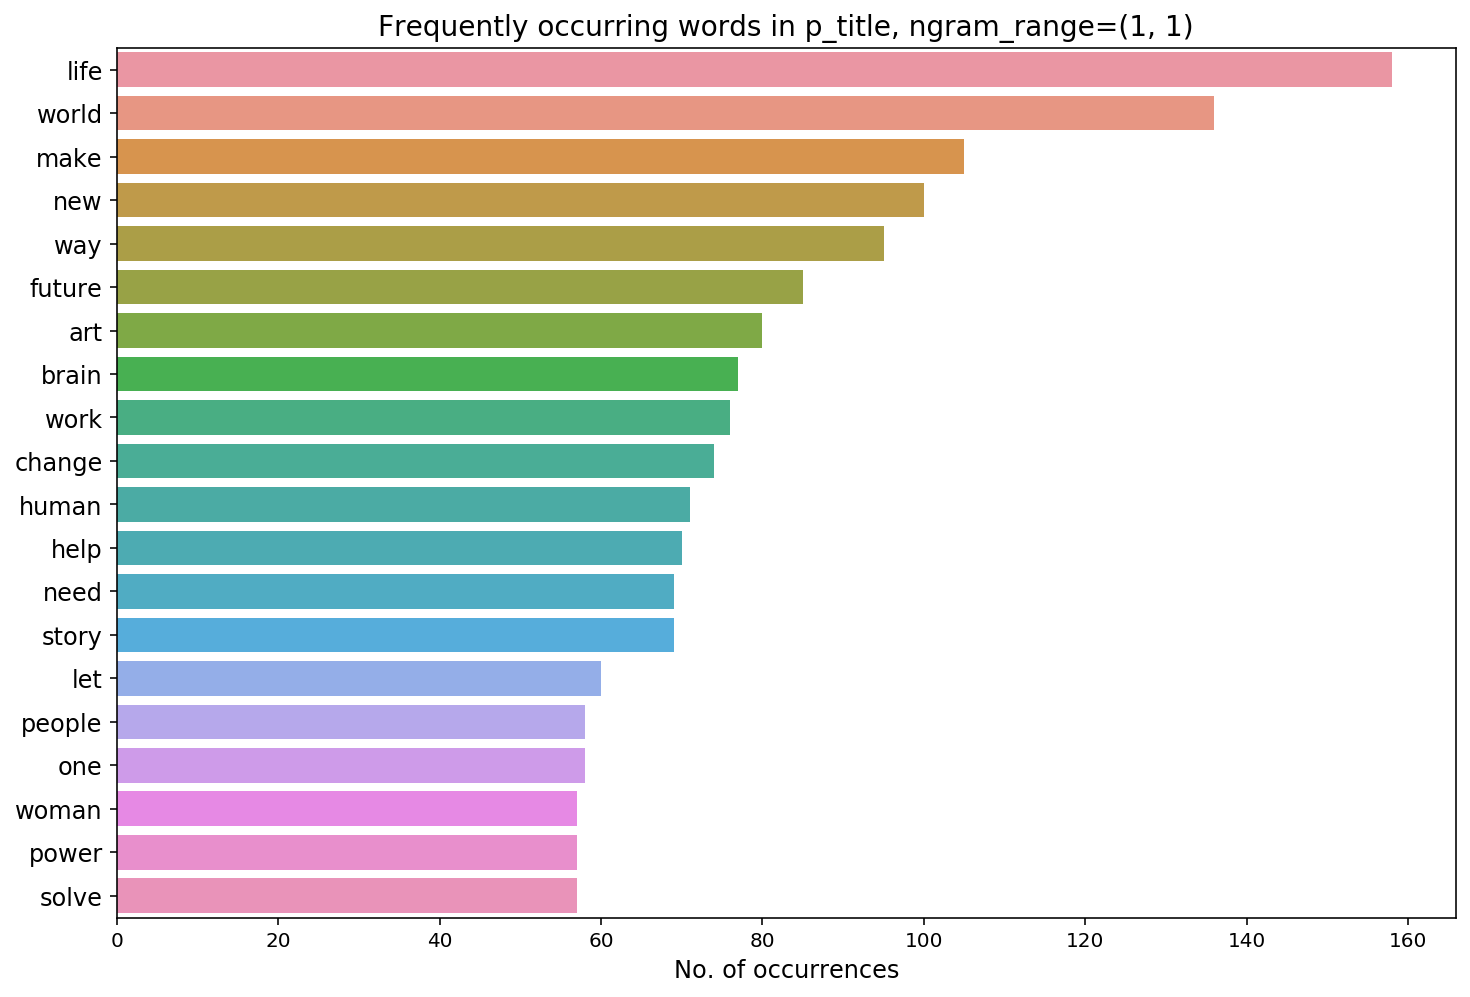

In [8]:
# top occurring words in title
plot_top_words("p_title",
               stop_words = title_stopwords,
               ngram_range = (1,1))

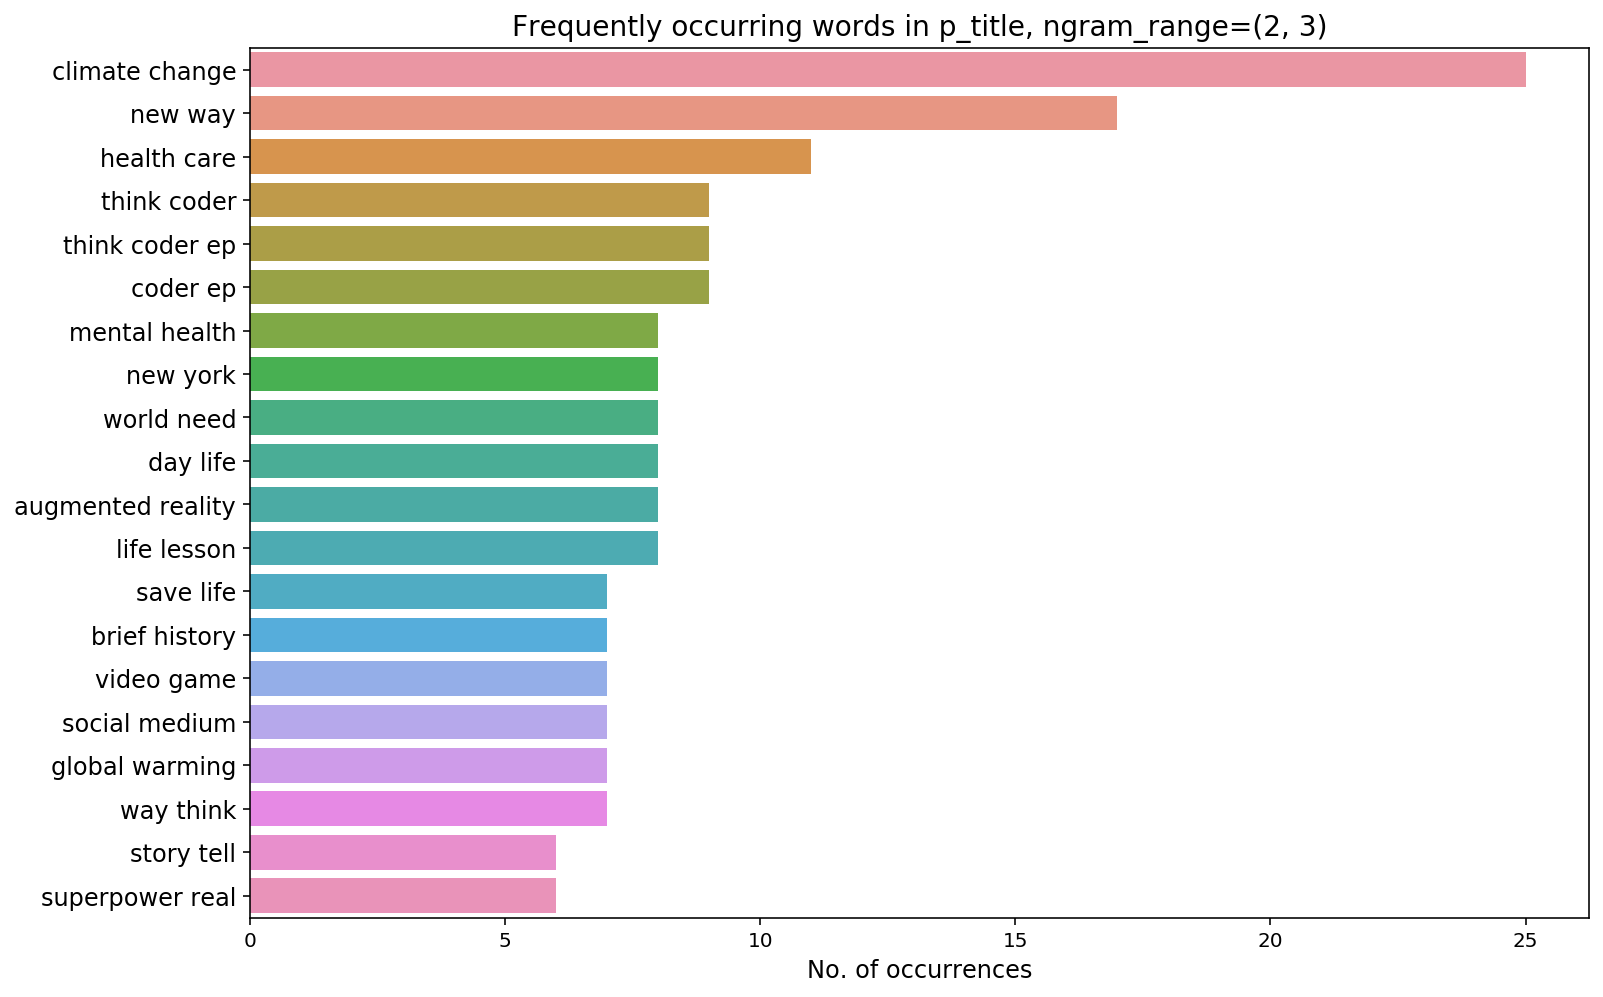

In [9]:
# top occurring words in title
plot_top_words("p_title",
               stop_words = title_stopwords,
               ngram_range = (2,3))

An initial analysis of the top occurring words in the talks' titles with an ngram of (1,1) revealed little about the talks. However, after removing additional stopwords such as "could" and "like", as well as increasing the ngram range to inlcude bigrams, more insights could be gleaned on the type of topics that were frequently discussed in the talks. These included topics on climate change, mental health, augmented reality, coding, etc.

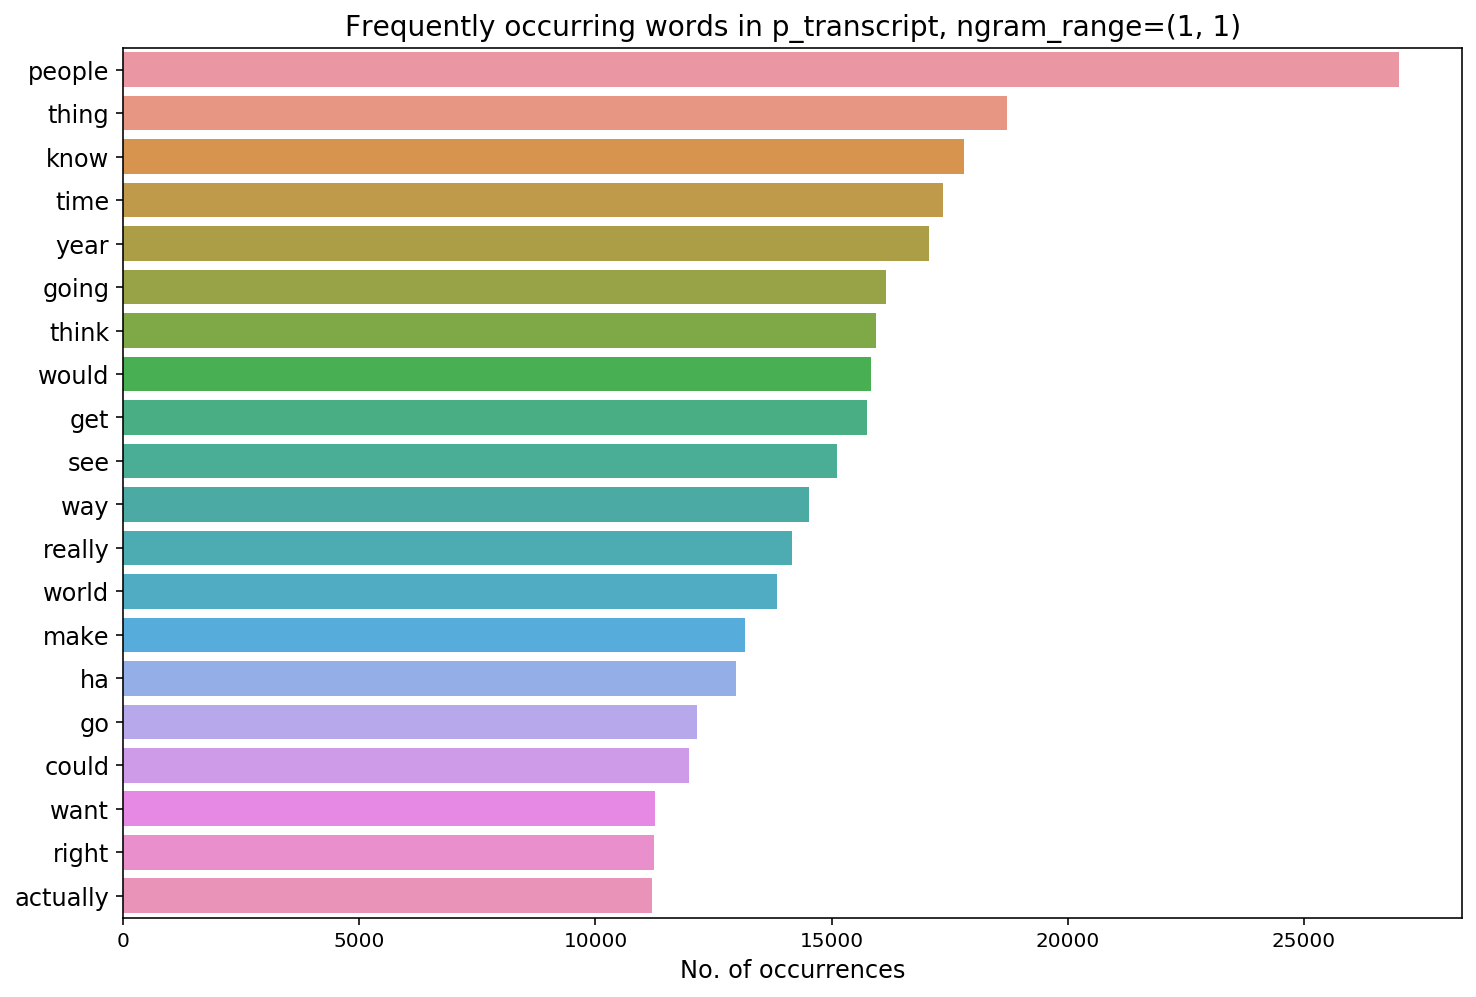

In [10]:
# top occurring words in transcript
plot_top_words("p_transcript",
               stop_words = transcript_stopwords,
               ngram_range = (1,1),
               max_features = 500,
               max_df = 0.9
)

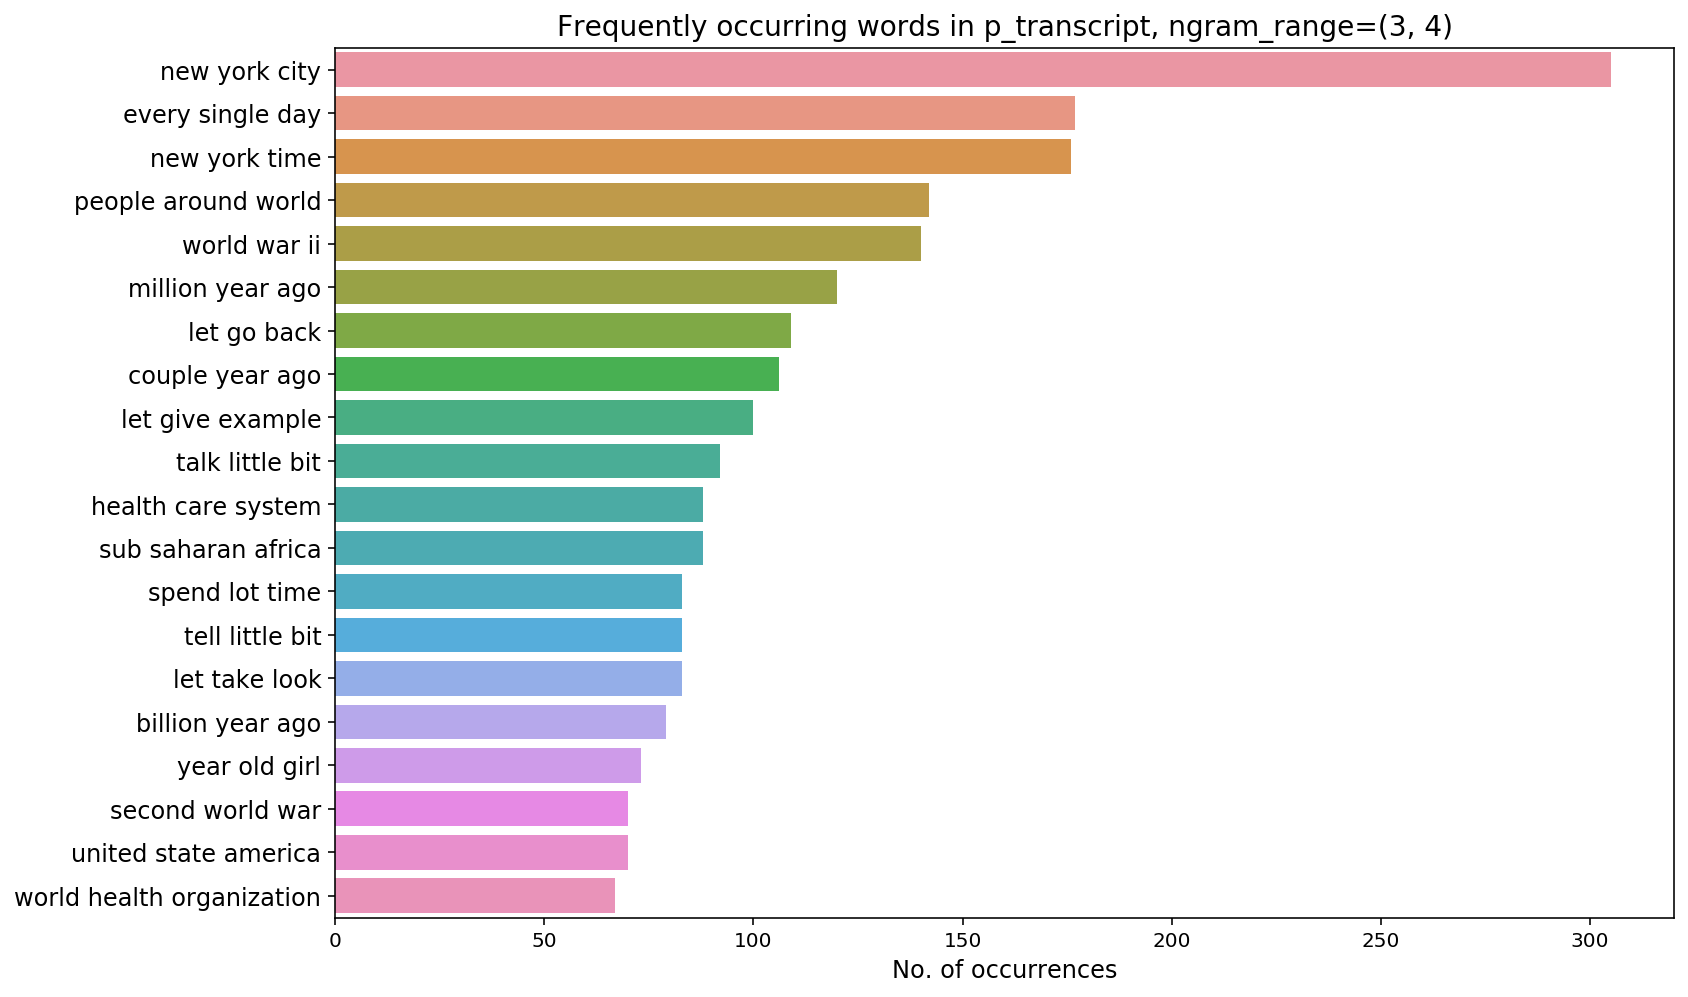

In [11]:
# top occurring words in transcript
plot_top_words("p_transcript",
               stop_words = transcript_stopwords,
               ngram_range = (3,4),
               max_features = 500,
               max_df = 0.9
)

Similar to the analysis on top occurring words in the talks' titles, an ngram range of (1,1) revealed words that were not particularly useful in understanding the transcipts. Nontheless, after increasing the ngram range, we can now understand how speakers typically conduct their talks using phrases like "let go back", "year ago" - recounting past incidents, "let give example" - analogising, and "talk/tell little bit" - inciting discussion. In addition, the anlysis also revelaed some top occurring themes relating to Afria, healthcare and WHO, and USA/New York.

## Drop columns not used for modelling

In [12]:
# instance of missing value in p_title
# due to the words used in the title
# that have been recognised as stopwords and removed during preprocessing
display(ted_talks.loc[[2259]][["title", "p_title"]])

# drop instance & reset index
ted_talks.drop([2259], axis=0, inplace=True)
ted_talks.reset_index(drop=True, inplace=True)

,title,p_title
2259,"Can we all ""have it all""?",


In [13]:
# list of columns to drop
cols_to_drop = ["id", 
                "title", 
                "description", 
                "url", 
                "num_views", 
                "video_type", 
                "event", 
                "institute_name", 
                "salon_name", 
                "more_resources", 
                "recommendations", 
                "languages", 
                "published_time", 
                "recorded_date", 
                "num_months", 
                "transcript"]

related_talk_cols = [c for c in ted_talks.columns if "related_talk" in c]

speaker_cols = [c for c in ted_talks.columns if "speaker" in c]

cols_to_drop.extend(related_talk_cols + speaker_cols)

In [14]:
# drop columns
ted_talks.drop(cols_to_drop, axis=1, inplace=True)

## Export dataset as csv for modelling

In [15]:
ted_talks.to_csv("../data/ted_talks_model.csv", index=False)